In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
# Data source: https://github.com/fivethirtyeight/data/blob/master/comma-survey/comma-survey.csv

## Part 1 - Data Wrangling

In [52]:
commas = pd.read_csv('comma-survey.csv')

In [53]:
commas.head()
commas.columns.tolist()

['RespondentID',
 'In your opinion, which sentence is more gramatically correct?',
 'Prior to reading about it above, had you heard of the serial (or Oxford) comma?',
 'How much, if at all, do you care about the use (or lack thereof) of the serial (or Oxford) comma in grammar?',
 'How would you write the following sentence?',
 'When faced with using the word "data", have you ever spent time considering if the word was a singular or plural noun?',
 'How much, if at all, do you care about the debate over the use of the word "data" as a singluar or plural noun?',
 'In your opinion, how important or unimportant is proper use of grammar?',
 'Gender',
 'Age',
 'Household Income',
 'Education',
 'Location (Census Region)']

In [54]:
# Rewrite the column names as the original ones are too big.
commas.columns = ['ID','sentence_1', 'heard_of_comma', 'care_about_comma','sentence_2','data_number','data_debate', 'grammar_important', 'gender', 'age_group', 'income_cat', 'education', 'region']

In [55]:
# Check if any values are missing or not.
commas.isnull().sum()

ID                     0
sentence_1             0
heard_of_comma        30
care_about_comma      30
sentence_2            36
data_number           38
data_debate           38
grammar_important     70
gender                92
age_group             92
income_cat           293
education            103
region               102
dtype: int64

In [56]:
# Find out how many unique values the 'care_about_comma' column has.
commas['care_about_comma'].value_counts()

care_about_comma
Some          414
A lot         291
Not much      268
Not at all    126
Name: count, dtype: int64

In [57]:
# Find out how many unique values the 'grammar_important' column has.
commas['grammar_important'].value_counts()

grammar_important
Very important                                 688
Somewhat important                             333
Neither important nor unimportant (neutral)     26
Somewhat unimportant                             7
Very unimportant                                 5
Name: count, dtype: int64

In [58]:
# Make the 'grammar_important' column a binary variable.
def recode_importance(x):
    if pd.isnull(x):
        return x
    elif 'unimportant' in x:
        return 'Not Important'
    else:
        return 'Important'
    
commas['grammar_important_binary'] = commas['grammar_important'].apply(recode_importance)

In [59]:
commas['grammar_important_binary'].value_counts()

grammar_important_binary
Important        1021
Not Important      38
Name: count, dtype: int64

In [60]:
# Make the crosstab.
pd.crosstab(commas['grammar_important_binary'], commas['care_about_comma'])

care_about_comma,A lot,Not at all,Not much,Some
grammar_important_binary,,,,
Important,283,105,239,394
Not Important,2,13,15,8


In [61]:
# Re-order the crosstab.
table = pd.crosstab(commas['grammar_important_binary'], commas['care_about_comma']).reindex(columns = 
                                                        ['Not at all', 'Not much', 'Some', 'A lot'],
                                                        index = ['Not Important', 'Important'])
table

care_about_comma,Not at all,Not much,Some,A lot
grammar_important_binary,,,,
Not Important,13,15,8,2
Important,105,239,394,283


## Part 2 - Creating and refining a bar chart

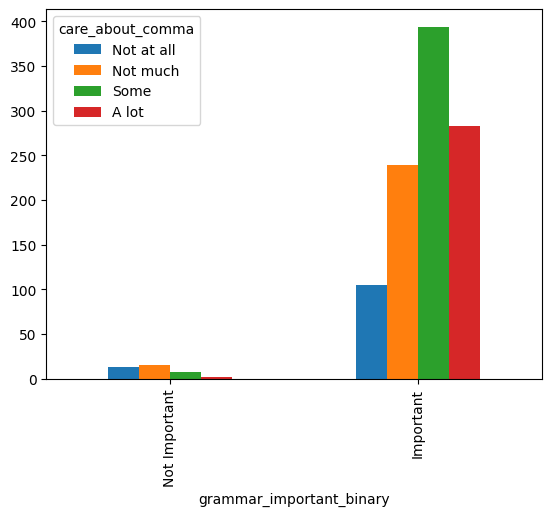

In [62]:
# Unstacked
table.plot.bar()
plt.show() # To prevent a bunch of printed output

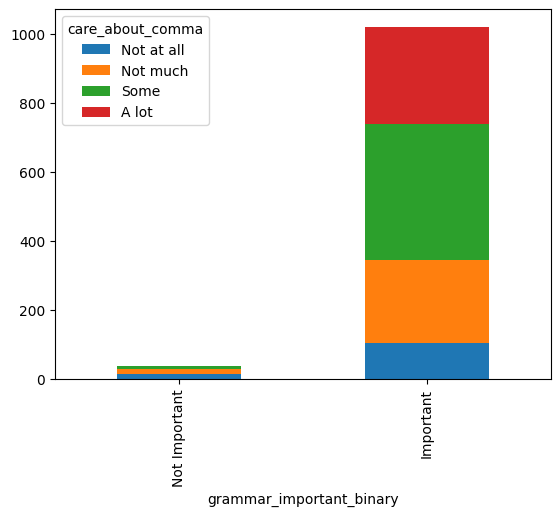

In [63]:
# Stacked
table.plot.bar(stacked = True)
plt.show()

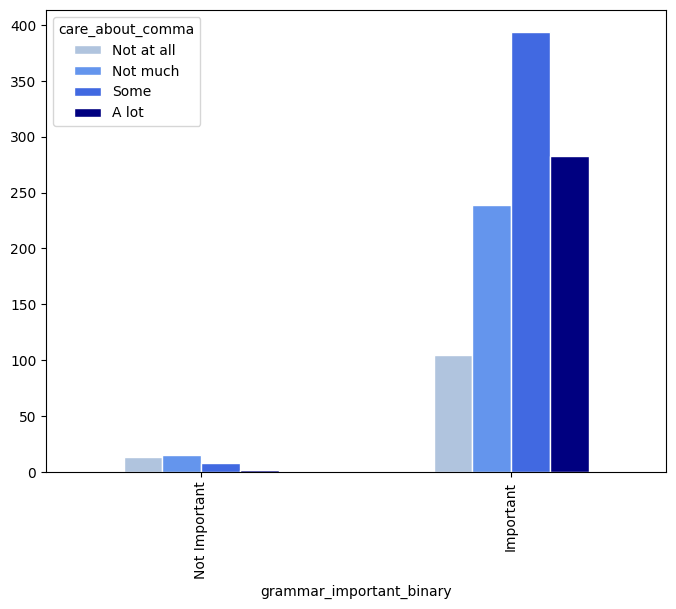

In [64]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot

# We can use colormap: https://matplotlib.org/stable/tutorials/colors/colormaps.html
# or choose colors individually: https://matplotlib.org/stable/tutorials/colors/colormaps.html

# Some colors we could use using 'colormap' or 'color' attribute.
# colormap = 'tab10'
# color = ['mistyrose', 'seagreen', 'cornflowerblue', 'indigo']
# color = ['lightsteelblue', 'cornflowerblue', 'royalblue', 'navy']

# 'figsize' sets the size of the whole figure.
# 'linewidth' and 'edgecolor' work with each other.
# 'linewidth' sets the size of the edge.

table.plot.bar(figsize = [8,6], linewidth = 1, edgecolor = 'white', color = ['lightsteelblue', 'cornflowerblue', 'royalblue', 'navy'])
plt.show()

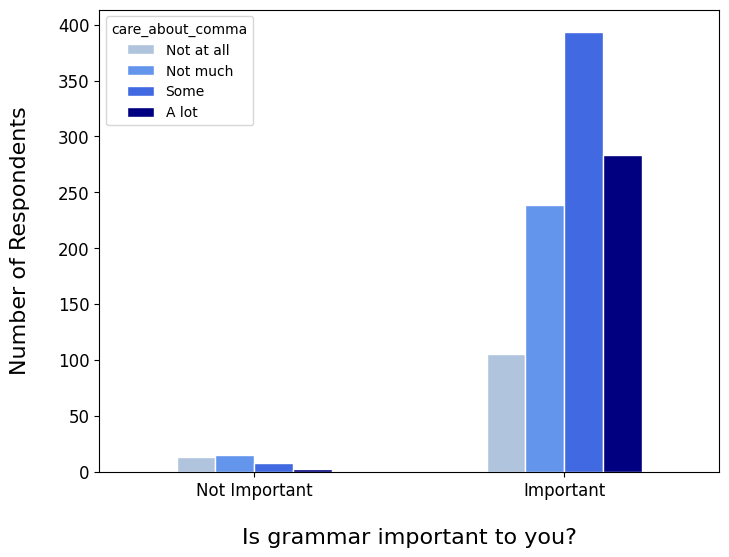

In [65]:
# Be sure to paste in our chosen colors.
# 'rot' sets the angle for the categories on the x-axis.
# 'fontsize' is for both x-axis and y-axis.
table.plot.bar(figsize = [8,6], rot = 0, fontsize = 12, linewidth = 1, edgecolor = 'white', color = ['lightsteelblue', 'cornflowerblue', 'royalblue', 'navy'])

# '.xlabel()' and '.ylabel()' functions are used to set labels.
# 'fontize' here is for the labels only.
# 'labelpad' sets how much space is between the label and the original figure.
plt.xlabel('Is grammar important to you?', fontsize = 16, labelpad = 20)
plt.ylabel('Number of Respondents', fontsize = 16, labelpad = 20)
plt.show()

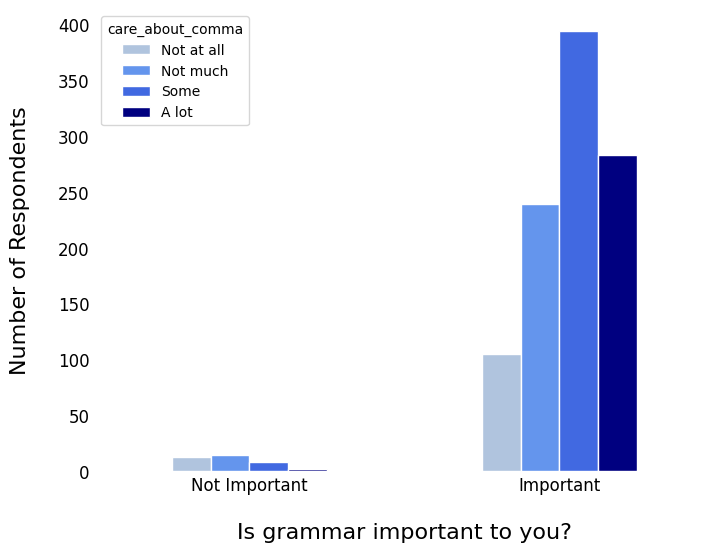

In [66]:
# What non-data ink can we remove?
# In order to access other attributes after the figure is created, we have to create an object of the plot.
ax = table.plot.bar(figsize = [8,6], rot = 0, fontsize = 12, linewidth = 1, edgecolor = 'white', color = ['lightsteelblue', 'cornflowerblue', 'royalblue', 'navy'])
plt.xlabel('Is grammar important to you?', fontsize = 16, labelpad = 20)
plt.ylabel('Number of Respondents', fontsize = 16, labelpad = 20)

# 'spines' attribute is associated with the border of the figure.
# We can use the '.set_visible()' function to get rid of spines.
[ax.spines[i].set_visible(False) for i in ax.spines] # Remove spines.

# '.tick_params()' controls the ticks of both the x-axis and the y-axis.
# 'length' attribute here controls the length of the ticks.
ax.tick_params(length=0) # Remove ticks.
plt.show()

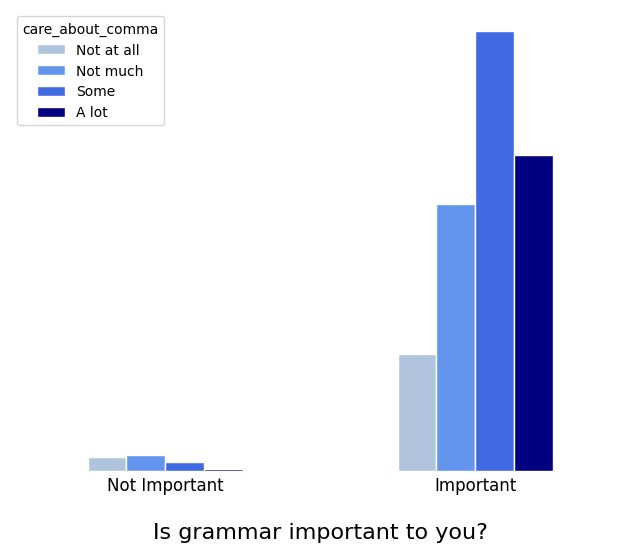

In [67]:
# Paste in our code from above.
ax = table.plot.bar(figsize = [8,6], rot = 0, fontsize = 12, linewidth = 1, edgecolor = 'white', color = ['lightsteelblue', 'cornflowerblue', 'royalblue', 'navy'])
plt.xlabel('Is grammar important to you?', fontsize = 16, labelpad = 20)
[ax.spines[i].set_visible(False) for i in ax.spines]
ax.tick_params(length=0)

# Remove y-axis.
ax.get_yaxis().set_visible(False)
plt.show()

In [68]:
# Look at the patches
for patch in ax.patches:
    print(patch)

Rectangle(xy=(-0.25, 0), width=0.125, height=13, angle=0)
Rectangle(xy=(0.75, 0), width=0.125, height=105, angle=0)
Rectangle(xy=(-0.125, 0), width=0.125, height=15, angle=0)
Rectangle(xy=(0.875, 0), width=0.125, height=239, angle=0)
Rectangle(xy=(0, 0), width=0.125, height=8, angle=0)
Rectangle(xy=(1, 0), width=0.125, height=394, angle=0)
Rectangle(xy=(0.125, 0), width=0.125, height=2, angle=0)
Rectangle(xy=(1.125, 0), width=0.125, height=283, angle=0)


In [69]:
# We can access any attributes from the patch using functions.
for patch in ax.patches:
    print(patch.get_height()) 

13
105
15
239
8
394
2
283


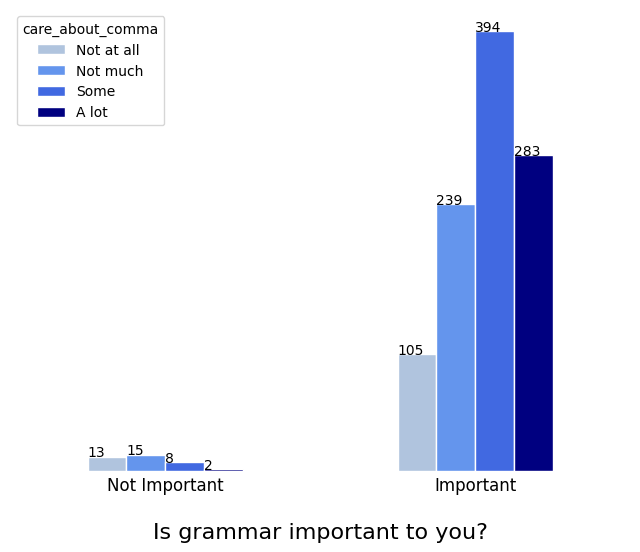

In [70]:
# As we got rid of the y-axis, we have to add the values as text.
# Paste in plot code so far.
ax = table.plot.bar(figsize = [8,6], rot = 0, fontsize = 12, linewidth = 1, edgecolor = 'white', color = ['lightsteelblue', 'cornflowerblue', 'royalblue', 'navy'])
plt.xlabel('Is grammar important to you?', fontsize = 16, labelpad = 20)
[ax.spines[i].set_visible(False) for i in ax.spines]
ax.tick_params(length=0)
ax.get_yaxis().set_visible(False)

# We will get the x and y values from the patches and create a text on that location.
for patch in ax.patches:
    height,x = patch.get_height(), patch.get_x()
    plt.text(x,height,str(height)) #plt.text(x,y,actual_text)
plt.show()

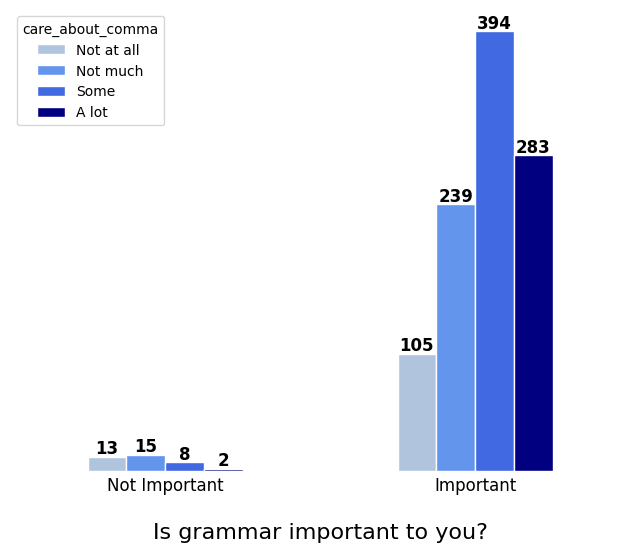

In [71]:
# Refine the text, we want the text bolded, in the center, and a little bit up.
ax = table.plot.bar(figsize = [8,6], rot = 0, fontsize = 12, linewidth = 1, edgecolor = 'white', color = ['lightsteelblue', 'cornflowerblue', 'royalblue', 'navy'])
plt.xlabel('Is grammar important to you?', fontsize = 16, labelpad = 20)
[ax.spines[i].set_visible(False) for i in ax.spines]
ax.tick_params(length=0)
ax.get_yaxis().set_visible(False)

# 'fontsize', 'horizontalalignment', and 'weight' help us do that.
NUDGE = 3
for patch in ax.patches:
    height,x = patch.get_height(), patch.get_x()
    center_point = x + patch.get_width()/2
    plt.text(center_point,height + NUDGE, str(height), fontsize = 12, horizontalalignment = 'center',
        weight = 'bold')

In [79]:
# Fix the legend!
# We can just paste our other code here.
ax = table.plot.barh(figsize = [8,6], rot = 0, fontsize = 12, linewidth = 1, edgecolor = 'white', color = ['lightsteelblue', 'cornflowerblue', 'royalblue', 'navy'])
plt.ylabel('Is grammar important to you?', fontsize = 16, labelpad = 20)
[ax.spines[i].set_visible(False) for i in ax.spines]
ax.tick_params(length=0)
ax.get_xaxis().set_visible(False)

NUDGE = 3
for patch in ax.patches:
    width,y = patch.get_width(), patch.get_y()
    center_point = x + patch.get_width()/2
    plt.text(width + NUDGE, str(width), fontsize = 12, horizontalalignment = 'center',
        weight = 'bold', s='')

# Create a legend object first.
# We have a bunch of attributes that we can control during the constructor call.
# 'fontsize' and 'title_fontsize' do exactly what the names suggest.
# 'title' is for the text.
# 'shadow' and 'fancybox' make the legend fancy.
# 'markerfirst' controls the order of the color and text.
# 'labelspacing' controls the space between the keys.


leg = plt.legend(fontsize = 12, title_fontsize = 16, title = 'Do you care about\nthe Oxford comma?',
                fancybox = True, shadow = True, markerfirst = False, labelspacing = 0.5)
# We can access just the title using the 'get_title()' function.
# 'set_multialignment()' helps us change the alignment of the text.
leg.get_title().set_multialignment('center') # Centers the title

# Save the plot.
# Leave off 'facecolor' for transparency.
plt.savefig('Unstacked.png', bbox_inches = 'tight', facecolor = 'white') 
plt.show()

TypeError: _compat_get_offset.<locals>.<lambda>() missing 2 required positional arguments: 'bbox' and 'renderer'

Error in callback <function _draw_all_if_interactive at 0x0000022815FCEDE0> (for post_execute), with arguments args (),kwargs {}:


TypeError: _compat_get_offset.<locals>.<lambda>() missing 2 required positional arguments: 'bbox' and 'renderer'

TypeError: _compat_get_offset.<locals>.<lambda>() missing 2 required positional arguments: 'bbox' and 'renderer'

<Figure size 800x600 with 1 Axes>

In [ ]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs) -> 'Legend'
    Place a legend on the Axes.

    Call signatures::

        legend()
        legend(handles, labels)
        legend(handles=handles)
        legend(labels)

    The call signatures correspond to the following different ways to use
    this method:

    **1. Automatic detection of elements to be shown in the legend**

    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.

    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::

        ax.plot([1, 2, 3], label='Inline label')
        ax.legend()

    or::

        line, = ax.plot([1, 2, 3])
        line.set_label('Label via method')
        ax.legend()

    .. note::
        Specific artists can be excluded from the automatic legend element
        selectio